<a href="https://colab.research.google.com/github/ms-jayanth/Sentiment_Analysis-Amazon_Reviews/blob/main/AMAZON_SENTIMENTAL_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) BUSINESS UNDERSTANDING

# 2) DATA COLLECTION

#### IMPORT NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.express as px
import plotly.figure_factory as ff

from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
import cufflinks
cufflinks.go_offline()

from textblob import TextBlob # for Text Polarity
import re # regular expression
import nltk
from nltk.stem.porter import PorterStemmer # for Stemming
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer # for Lemmatization
nltk.download('stopwords')
from nltk.corpus import stopwords

from wordcloud import WordCloud

from afinn import Afinn
nltk.download('punkt')# for punctuiations
from nltk import tokenize
import spacy

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from gensim.models import Word2Vec,KeyedVectors

from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.model_selection import train_test_split


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
product_data = pd.read_csv("amazon_product_webscrp_reviews.csv")

In [ ]:
product_data.head(11)

Unnamed: 0                    Customer Name  \
0            0  Thakur Ankur Kumar Pratap singh   
1            1                             Gems   
2            2                      Vikas Singh   
3            3                           Sumit    
4            4                      Vijay Kumar   
5            5               Akash singh nishad   
6            6                           Singam   
7            7                        ARNPRASAD   
8            8                      Indrani Das   
9            9                    Bhuvan Luthra   
10          10                             Jack   

                                               Review             Ratings  \
0                         Google is infinitely better  1.0 out of 5 stars   
1                                     Not that useful  3.0 out of 5 stars   
2   Echo Dot never plays original songs, (No way t...  1.0 out of 5 stars   
3                      I recommend one more accessory  5.0 out of 5 stars   
4          Amazon is selling an experimental product.  1.0 out of 5 stars   
5   No warranty should be given to you so be alert...  1.0 out of 5 stars   
6                   Loved sound quality, it's awesome  5.0 out of 5 stars   
7     Combo with smart bulb reaches US deal price!!!!  5.0 out of 5 stars   
8                       Value for money smart speaker  5.0 out of 5 stars   
9                               Alexa a chinese agent  1.0 out of 5 stars   
10                                            Awesome  5.0 out of 5 stars   

                                                 Body  
0   Even the best devices can be ruined by poor so...  
1   I purchased this as a birthday gift for my 7 y...  
2                       The media could not be loa...  
3   Its just one if the best deal i ever got on am...  
4   Before buying this product please keep these p...  
5                       The media could not be loa...  
6   I am using alexa dot 2nd Gen and today I have ...  
7   For 2000 using 10% off..you are getting a bulb...  
8   I was quite confused between echo dot 3rd & 4t...  
9                       The media could not be loa...  
10                      The media could not be loa...

In [ ]:
product_data.tail()

Unnamed: 0     Customer Name              Review             Ratings  \
3495        3495  Kushagra Agrawal               Wow👌🏻  5.0 out of 5 stars   
3496        3496  PV Gopalkrishnan          Yes and No  4.0 out of 5 stars   
3497        3497           Hetansh              Good 👍  5.0 out of 5 stars   
3498        3498   Ghanshyam Dayma  Buy the bigger one  2.0 out of 5 stars   
3499        3499     Pramod Tiwari       Slow response  1.0 out of 5 stars   

                                                   Body  
3495      Very nice just like a friend very good choice  
3496  Liked the compatibility but Alexa needs to be ...  
3497                                             Good 👍  
3498  Very limited performance. However, audio is good.  
3499  Lagging problem and at times doesn't work on v...

# 3) DATA UNDERSTANDING

#### INITIAL ANALYSIS

In [ ]:
product_data.shape

(3500, 5)

In [ ]:
product_data.dtypes

Unnamed: 0        int64
Customer Name    object
Review           object
Ratings          object
Body             object
dtype: object

In [ ]:
product_data.describe(include="all")

Unnamed: 0                    Customer Name Review  \
count   3500.000000                             3500   3500   
unique          NaN                             3500   2638   
top             NaN  Thakur Ankur Kumar Pratap singh   Good   
freq            NaN                                1    115   
mean    1749.500000                              NaN    NaN   
std     1010.507298                              NaN    NaN   
min        0.000000                              NaN    NaN   
25%      874.750000                              NaN    NaN   
50%     1749.500000                              NaN    NaN   
75%     2624.250000                              NaN    NaN   
max     3499.000000                              NaN    NaN   

                   Ratings  Body  
count                 3500  3484  
unique                   5  3230  
top     5.0 out of 5 stars  Good  
freq                  1887    57  
mean                   NaN   NaN  
std                    NaN   NaN  
min                    NaN   NaN  
25%                    NaN   NaN  
50%                    NaN   NaN  
75%                    NaN   NaN  
max                    NaN   NaN

In [ ]:
product_data.duplicated().sum()

0

In [ ]:
product_data.isnull().sum()

Unnamed: 0        0
Customer Name     0
Review            0
Ratings           0
Body             16
dtype: int64

# 4) DATA PREPARATION

In [ ]:
del product_data['Unnamed: 0']

In [ ]:
product_data.dropna(inplace=True)

In [ ]:
product_data.isnull().sum()

Customer Name    0
Review           0
Ratings          0
Body             0
dtype: int64

In [ ]:
product_data.dtypes

Customer Name    object
Review           object
Ratings          object
Body             object
dtype: object

In [ ]:
product_data['Ratings'].replace({'5.0 out of 5 stars':5.0,
                                '4.0 out of 5 stars':4.0,
                                '3.0 out of 5 stars':3.0,
                                '2.0 out of 5 stars':2.0,
                                '1.0 out of 5 stars':1.0}, inplace=True)

In [ ]:
product_data.dtypes

Customer Name     object
Review            object
Ratings          float64
Body              object
dtype: object

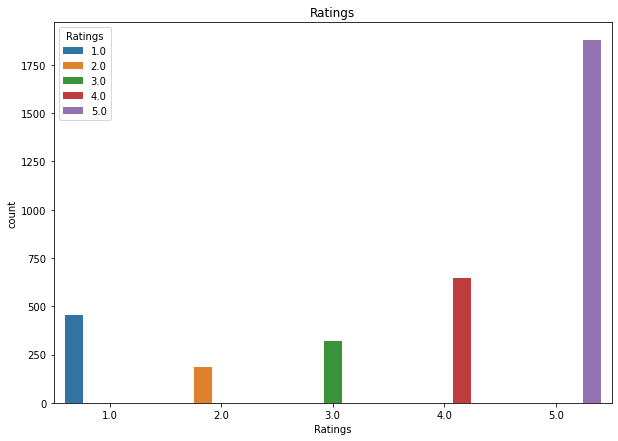

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='Ratings',hue='Ratings',data=product_data,)# By using seaborn
plt.xlabel('Ratings')
plt.title('Ratings')
plt.show()

In [ ]:
ratings = pd.DataFrame({'Ratings':(5.0,4.0,3.0,2.0,1.0),
             'Counts':(1877,645,455,322,185)})

In [ ]:
product_data['Ratings'].value_counts()

5.0    1877
4.0     645
1.0     455
3.0     322
2.0     185
Name: Ratings, dtype: int64

In [ ]:
px.bar(data_frame=ratings,
    x='Ratings', y='Counts', color='Ratings',template='plotly_dark')# By using Plotly


In [ ]:
product_data['Ratings'].value_counts().iplot(kind ='bar', colors = 'red')# By using Plotly with Cufflinks

### Sentimental Analysis

In [ ]:
product_data['Polarity']= product_data['Body'].apply(lambda Body : TextBlob(Body).sentiment.polarity)

In [ ]:
product_data.head(11)

Customer Name  \
0   Thakur Ankur Kumar Pratap singh   
1                              Gems   
2                       Vikas Singh   
3                            Sumit    
4                       Vijay Kumar   
5                Akash singh nishad   
6                            Singam   
7                         ARNPRASAD   
8                       Indrani Das   
9                     Bhuvan Luthra   
10                             Jack   

                                               Review  Ratings  \
0                         Google is infinitely better      1.0   
1                                     Not that useful      3.0   
2   Echo Dot never plays original songs, (No way t...      1.0   
3                      I recommend one more accessory      5.0   
4          Amazon is selling an experimental product.      1.0   
5   No warranty should be given to you so be alert...      1.0   
6                   Loved sound quality, it's awesome      5.0   
7     Combo with smart bulb reaches US deal price!!!!      5.0   
8                       Value for money smart speaker      5.0   
9                               Alexa a chinese agent      1.0   
10                                            Awesome      5.0   

                                                 Body  Polarity  
0   Even the best devices can be ruined by poor so...  0.162885  
1   I purchased this as a birthday gift for my 7 y...  0.174127  
2                       The media could not be loa...  0.145833  
3   Its just one if the best deal i ever got on am...  0.315833  
4   Before buying this product please keep these p...  0.182143  
5                       The media could not be loa... -0.295000  
6   I am using alexa dot 2nd Gen and today I have ...  0.072619  
7   For 2000 using 10% off..you are getting a bulb...  0.039881  
8   I was quite confused between echo dot 3rd & 4t...  0.108466  
9                       The media could not be loa...  0.000000  
10                      The media could not be loa...  0.185357

In [ ]:
product_data['Polarity'].iplot(kind='hist')

In [ ]:
px.scatter(data_frame=product_data,
    x="Polarity",
    y=None)

In [ ]:
product_data["Word Count"]=product_data["Body"].apply(lambda Body: len(Body.split()))

In [ ]:
product_data.head(11)

Customer Name  \
0   Thakur Ankur Kumar Pratap singh   
1                              Gems   
2                       Vikas Singh   
3                            Sumit    
4                       Vijay Kumar   
5                Akash singh nishad   
6                            Singam   
7                         ARNPRASAD   
8                       Indrani Das   
9                     Bhuvan Luthra   
10                             Jack   

                                               Review  Ratings  \
0                         Google is infinitely better      1.0   
1                                     Not that useful      3.0   
2   Echo Dot never plays original songs, (No way t...      1.0   
3                      I recommend one more accessory      5.0   
4          Amazon is selling an experimental product.      1.0   
5   No warranty should be given to you so be alert...      1.0   
6                   Loved sound quality, it's awesome      5.0   
7     Combo with smart bulb reaches US deal price!!!!      5.0   
8                       Value for money smart speaker      5.0   
9                               Alexa a chinese agent      1.0   
10                                            Awesome      5.0   

                                                 Body  Polarity  Word Count  
0   Even the best devices can be ruined by poor so...  0.162885         641  
1   I purchased this as a birthday gift for my 7 y...  0.174127         202  
2                       The media could not be loa...  0.145833         196  
3   Its just one if the best deal i ever got on am...  0.315833          99  
4   Before buying this product please keep these p...  0.182143         274  
5                       The media could not be loa... -0.295000         159  
6   I am using alexa dot 2nd Gen and today I have ...  0.072619         112  
7   For 2000 using 10% off..you are getting a bulb...  0.039881         162  
8   I was quite confused between echo dot 3rd & 4t...  0.108466         134  
9                       The media could not be loa...  0.000000          26  
10                      The media could not be loa...  0.185357         112

In [ ]:
product_data['Word Count'].iplot(kind = 'hist')

In [ ]:
px.scatter(data_frame=product_data,
    x="Word Count",
    y=None)

In [ ]:
product_data['Review Length']= product_data['Body'].apply(lambda Body : len(Body))

In [ ]:
product_data.head(11)

Customer Name  \
0   Thakur Ankur Kumar Pratap singh   
1                              Gems   
2                       Vikas Singh   
3                            Sumit    
4                       Vijay Kumar   
5                Akash singh nishad   
6                            Singam   
7                         ARNPRASAD   
8                       Indrani Das   
9                     Bhuvan Luthra   
10                             Jack   

                                               Review  Ratings  \
0                         Google is infinitely better      1.0   
1                                     Not that useful      3.0   
2   Echo Dot never plays original songs, (No way t...      1.0   
3                      I recommend one more accessory      5.0   
4          Amazon is selling an experimental product.      1.0   
5   No warranty should be given to you so be alert...      1.0   
6                   Loved sound quality, it's awesome      5.0   
7     Combo with smart bulb reaches US deal price!!!!      5.0   
8                       Value for money smart speaker      5.0   
9                               Alexa a chinese agent      1.0   
10                                            Awesome      5.0   

                                                 Body  Polarity  Word Count  \
0   Even the best devices can be ruined by poor so...  0.162885         641   
1   I purchased this as a birthday gift for my 7 y...  0.174127         202   
2                       The media could not be loa...  0.145833         196   
3   Its just one if the best deal i ever got on am...  0.315833          99   
4   Before buying this product please keep these p...  0.182143         274   
5                       The media could not be loa... -0.295000         159   
6   I am using alexa dot 2nd Gen and today I have ...  0.072619         112   
7   For 2000 using 10% off..you are getting a bulb...  0.039881         162   
8   I was quite confused between echo dot 3rd & 4t...  0.108466         134   
9                       The media could not be loa...  0.000000          26   
10                      The media could not be loa...  0.185357         112   

    Review Length  
0            3604  
1            1087  
2            1168  
3             508  
4            1512  
5             960  
6             596  
7             876  
8             765  
9             181  
10            654

In [ ]:
product_data['Review Length'].iplot()

In [ ]:
px.scatter(data_frame=product_data,
    x="Review Length",
    y=None)

In [ ]:
def avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len= word_len + len(word)
        
    return word_len/len(words)

In [ ]:
product_data['Common Word Length']= product_data['Body'].apply(lambda Body: avg_word_len(Body))

In [ ]:
product_data.head(11)

Customer Name  \
0   Thakur Ankur Kumar Pratap singh   
1                              Gems   
2                       Vikas Singh   
3                            Sumit    
4                       Vijay Kumar   
5                Akash singh nishad   
6                            Singam   
7                         ARNPRASAD   
8                       Indrani Das   
9                     Bhuvan Luthra   
10                             Jack   

                                               Review  Ratings  \
0                         Google is infinitely better      1.0   
1                                     Not that useful      3.0   
2   Echo Dot never plays original songs, (No way t...      1.0   
3                      I recommend one more accessory      5.0   
4          Amazon is selling an experimental product.      1.0   
5   No warranty should be given to you so be alert...      1.0   
6                   Loved sound quality, it's awesome      5.0   
7     Combo with smart bulb reaches US deal price!!!!      5.0   
8                       Value for money smart speaker      5.0   
9                               Alexa a chinese agent      1.0   
10                                            Awesome      5.0   

                                                 Body  Polarity  Word Count  \
0   Even the best devices can be ruined by poor so...  0.162885         641   
1   I purchased this as a birthday gift for my 7 y...  0.174127         202   
2                       The media could not be loa...  0.145833         196   
3   Its just one if the best deal i ever got on am...  0.315833          99   
4   Before buying this product please keep these p...  0.182143         274   
5                       The media could not be loa... -0.295000         159   
6   I am using alexa dot 2nd Gen and today I have ...  0.072619         112   
7   For 2000 using 10% off..you are getting a bulb...  0.039881         162   
8   I was quite confused between echo dot 3rd & 4t...  0.108466         134   
9                       The media could not be loa...  0.000000          26   
10                      The media could not be loa...  0.185357         112   

    Review Length  Common Word Length  
0            3604            4.624025  
1            1087            4.376238  
2            1168            4.755102  
3             508            4.141414  
4            1512            4.514599  
5             960            4.786164  
6             596            4.330357  
7             876            4.358025  
8             765            4.716418  
9             181            4.423077  
10            654            4.482143

In [ ]:
product_data['Common Word Length'].iplot()

In [ ]:
def sentiments(value):
    if(value>0.25):
        return 1
    elif(value< -0.25):
        return -1
    else:
        return 0

In [ ]:
product_data['Sentiments']= product_data['Polarity'].apply(lambda Polarity: sentiments(Polarity))

In [ ]:
product_data.head(11)

Customer Name  \
0   Thakur Ankur Kumar Pratap singh   
1                              Gems   
2                       Vikas Singh   
3                            Sumit    
4                       Vijay Kumar   
5                Akash singh nishad   
6                            Singam   
7                         ARNPRASAD   
8                       Indrani Das   
9                     Bhuvan Luthra   
10                             Jack   

                                               Review  Ratings  \
0                         Google is infinitely better      1.0   
1                                     Not that useful      3.0   
2   Echo Dot never plays original songs, (No way t...      1.0   
3                      I recommend one more accessory      5.0   
4          Amazon is selling an experimental product.      1.0   
5   No warranty should be given to you so be alert...      1.0   
6                   Loved sound quality, it's awesome      5.0   
7     Combo with smart bulb reaches US deal price!!!!      5.0   
8                       Value for money smart speaker      5.0   
9                               Alexa a chinese agent      1.0   
10                                            Awesome      5.0   

                                                 Body  Polarity  Word Count  \
0   Even the best devices can be ruined by poor so...  0.162885         641   
1   I purchased this as a birthday gift for my 7 y...  0.174127         202   
2                       The media could not be loa...  0.145833         196   
3   Its just one if the best deal i ever got on am...  0.315833          99   
4   Before buying this product please keep these p...  0.182143         274   
5                       The media could not be loa... -0.295000         159   
6   I am using alexa dot 2nd Gen and today I have ...  0.072619         112   
7   For 2000 using 10% off..you are getting a bulb...  0.039881         162   
8   I was quite confused between echo dot 3rd & 4t...  0.108466         134   
9                       The media could not be loa...  0.000000          26   
10                      The media could not be loa...  0.185357         112   

    Review Length  Common Word Length  Sentiments  
0            3604            4.624025           0  
1            1087            4.376238           0  
2            1168            4.755102           0  
3             508            4.141414           1  
4            1512            4.514599           0  
5             960            4.786164          -1  
6             596            4.330357           0  
7             876            4.358025           0  
8             765            4.716418           0  
9             181            4.423077           0  
10            654            4.482143           0

In [ ]:
product_data['Labels'] = product_data['Sentiments'].replace({1 :"POSITIVE", -1: 'NEGATIVE', 0: 'NEUTRAL'})

In [ ]:
product_data['Sentiments'].value_counts()

 1    2079
 0    1265
-1     140
Name: Sentiments, dtype: int64

In [ ]:
product_data.head(16)

Customer Name  \
0   Thakur Ankur Kumar Pratap singh   
1                              Gems   
2                       Vikas Singh   
3                            Sumit    
4                       Vijay Kumar   
5                Akash singh nishad   
6                            Singam   
7                         ARNPRASAD   
8                       Indrani Das   
9                     Bhuvan Luthra   
10                             Jack   
11                         Santhosh   
12                      Amit Sharma   
13                   RAVINDRA GOPAL   
14                 TechDevoteeIndia   
15                      Rahul Dubey   

                                               Review  Ratings  \
0                         Google is infinitely better      1.0   
1                                     Not that useful      3.0   
2   Echo Dot never plays original songs, (No way t...      1.0   
3                      I recommend one more accessory      5.0   
4          Amazon is selling an experimental product.      1.0   
5   No warranty should be given to you so be alert...      1.0   
6                   Loved sound quality, it's awesome      5.0   
7     Combo with smart bulb reaches US deal price!!!!      5.0   
8                       Value for money smart speaker      5.0   
9                               Alexa a chinese agent      1.0   
10                                            Awesome      5.0   
11                                        Alexa Sucks      3.0   
12  Prompt response and issue solving by Amazon Ku...      5.0   
13                                Average performance      3.0   
14       Fantastic sound quality but alexa is useless      2.0   
15           Good Hardware with just okayish software      3.0   

                                                 Body  Polarity  Word Count  \
0   Even the best devices can be ruined by poor so...  0.162885         641   
1   I purchased this as a birthday gift for my 7 y...  0.174127         202   
2                       The media could not be loa...  0.145833         196   
3   Its just one if the best deal i ever got on am...  0.315833          99   
4   Before buying this product please keep these p...  0.182143         274   
5                       The media could not be loa... -0.295000         159   
6   I am using alexa dot 2nd Gen and today I have ...  0.072619         112   
7   For 2000 using 10% off..you are getting a bulb...  0.039881         162   
8   I was quite confused between echo dot 3rd & 4t...  0.108466         134   
9                       The media could not be loa...  0.000000          26   
10                      The media could not be loa...  0.185357         112   
11  me "Alexa,  play .... ". Alexa "Sorry, I do no... -0.236607          94   
12  "Worst experience brought it on 12th August al... -0.343434         101   
13  I am returning after trying various commands f...  0.215278          97   
14  In comparison with Google voice assistant devi...  0.003214         269   
15  This review is for the Echo dot (3rd gen).On t...  0.286172         320   

    Review Length  Common Word Length  Sentiments    Labels  
0            3604            4.624025           0   NEUTRAL  
1            1087            4.376238           0   NEUTRAL  
2            1168            4.755102           0   NEUTRAL  
3             508            4.141414           1  POSITIVE  
4            1512            4.514599           0   NEUTRAL  
5             960            4.786164          -1  NEGATIVE  
6             596            4.330357           0   NEUTRAL  
7             876            4.358025           0   NEUTRAL  
8             765            4.716418           0   NEUTRAL  
9             181            4.423077           0   NEUTRAL  
10            654            4.482143           0   NEUTRAL  
11            552            4.851064           0   NEUTRAL  
12            566            4.613861          -1  NEGATIVE  
13            582      

In [ ]:
lz = WordNetLemmatizer()

In [ ]:
def text_mining(value):
    corpus = []
    for i in value:
        review = re.sub('[^a-zA-Z]',' ',str(i))# removing charaters apart from alphabets
        review = review.lower() # make it lowercase
        review = review.split() # instead of using tokanization we can use split as well
        review = [lz.lemmatize(word) for word in review if word not in stopwords.words('english')]
        # removing stopwords and perform lemmatization
        review = ' '.join(review)
        
        corpus.append(review) # finally join the strings(reviews)
    return corpus

In [ ]:
import nltk
nltk.download('omw-1.4')


review_data=text_mining(product_data["Body"])

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
#review_data=text_mining(product_data["Body"])

In [ ]:
review_data[:5]

['even best device ruined poor software bad ui classic case good device echo dot rd gen let horrendous software term sheer sound quality ability hear across room ed rd blow google home mini right water stop bought got wipro bulb free figured bad purchase boy wrong let begin alexa app whoever charge making app sent back remember clue whether tapped button tap highlighted remember everything used unresponsive back yeah alexa app sd gig ram phone lol alexa care layout button app navigation ugh take back big zero ease use navigational hierarchy forget grandpa even millennials would hard time app voice recognition time recognize every time smartness lack smartness displayed start asking follow question tallest man give answer follow tall alexa go berserk heralding device control light turn tv miraculous achievement blatant lie control via command nothing new people coding community done raspberry pi make smart incousion ai machine learning understands patter recognizes speech slur something

In [ ]:
wordcloud_data = ' '.join(review_data)

#### Displaying most Frequent or Common Words

In [ ]:
wordcloud =WordCloud(width=5000,height=3500, colormap='Set3').generate(wordcloud_data)


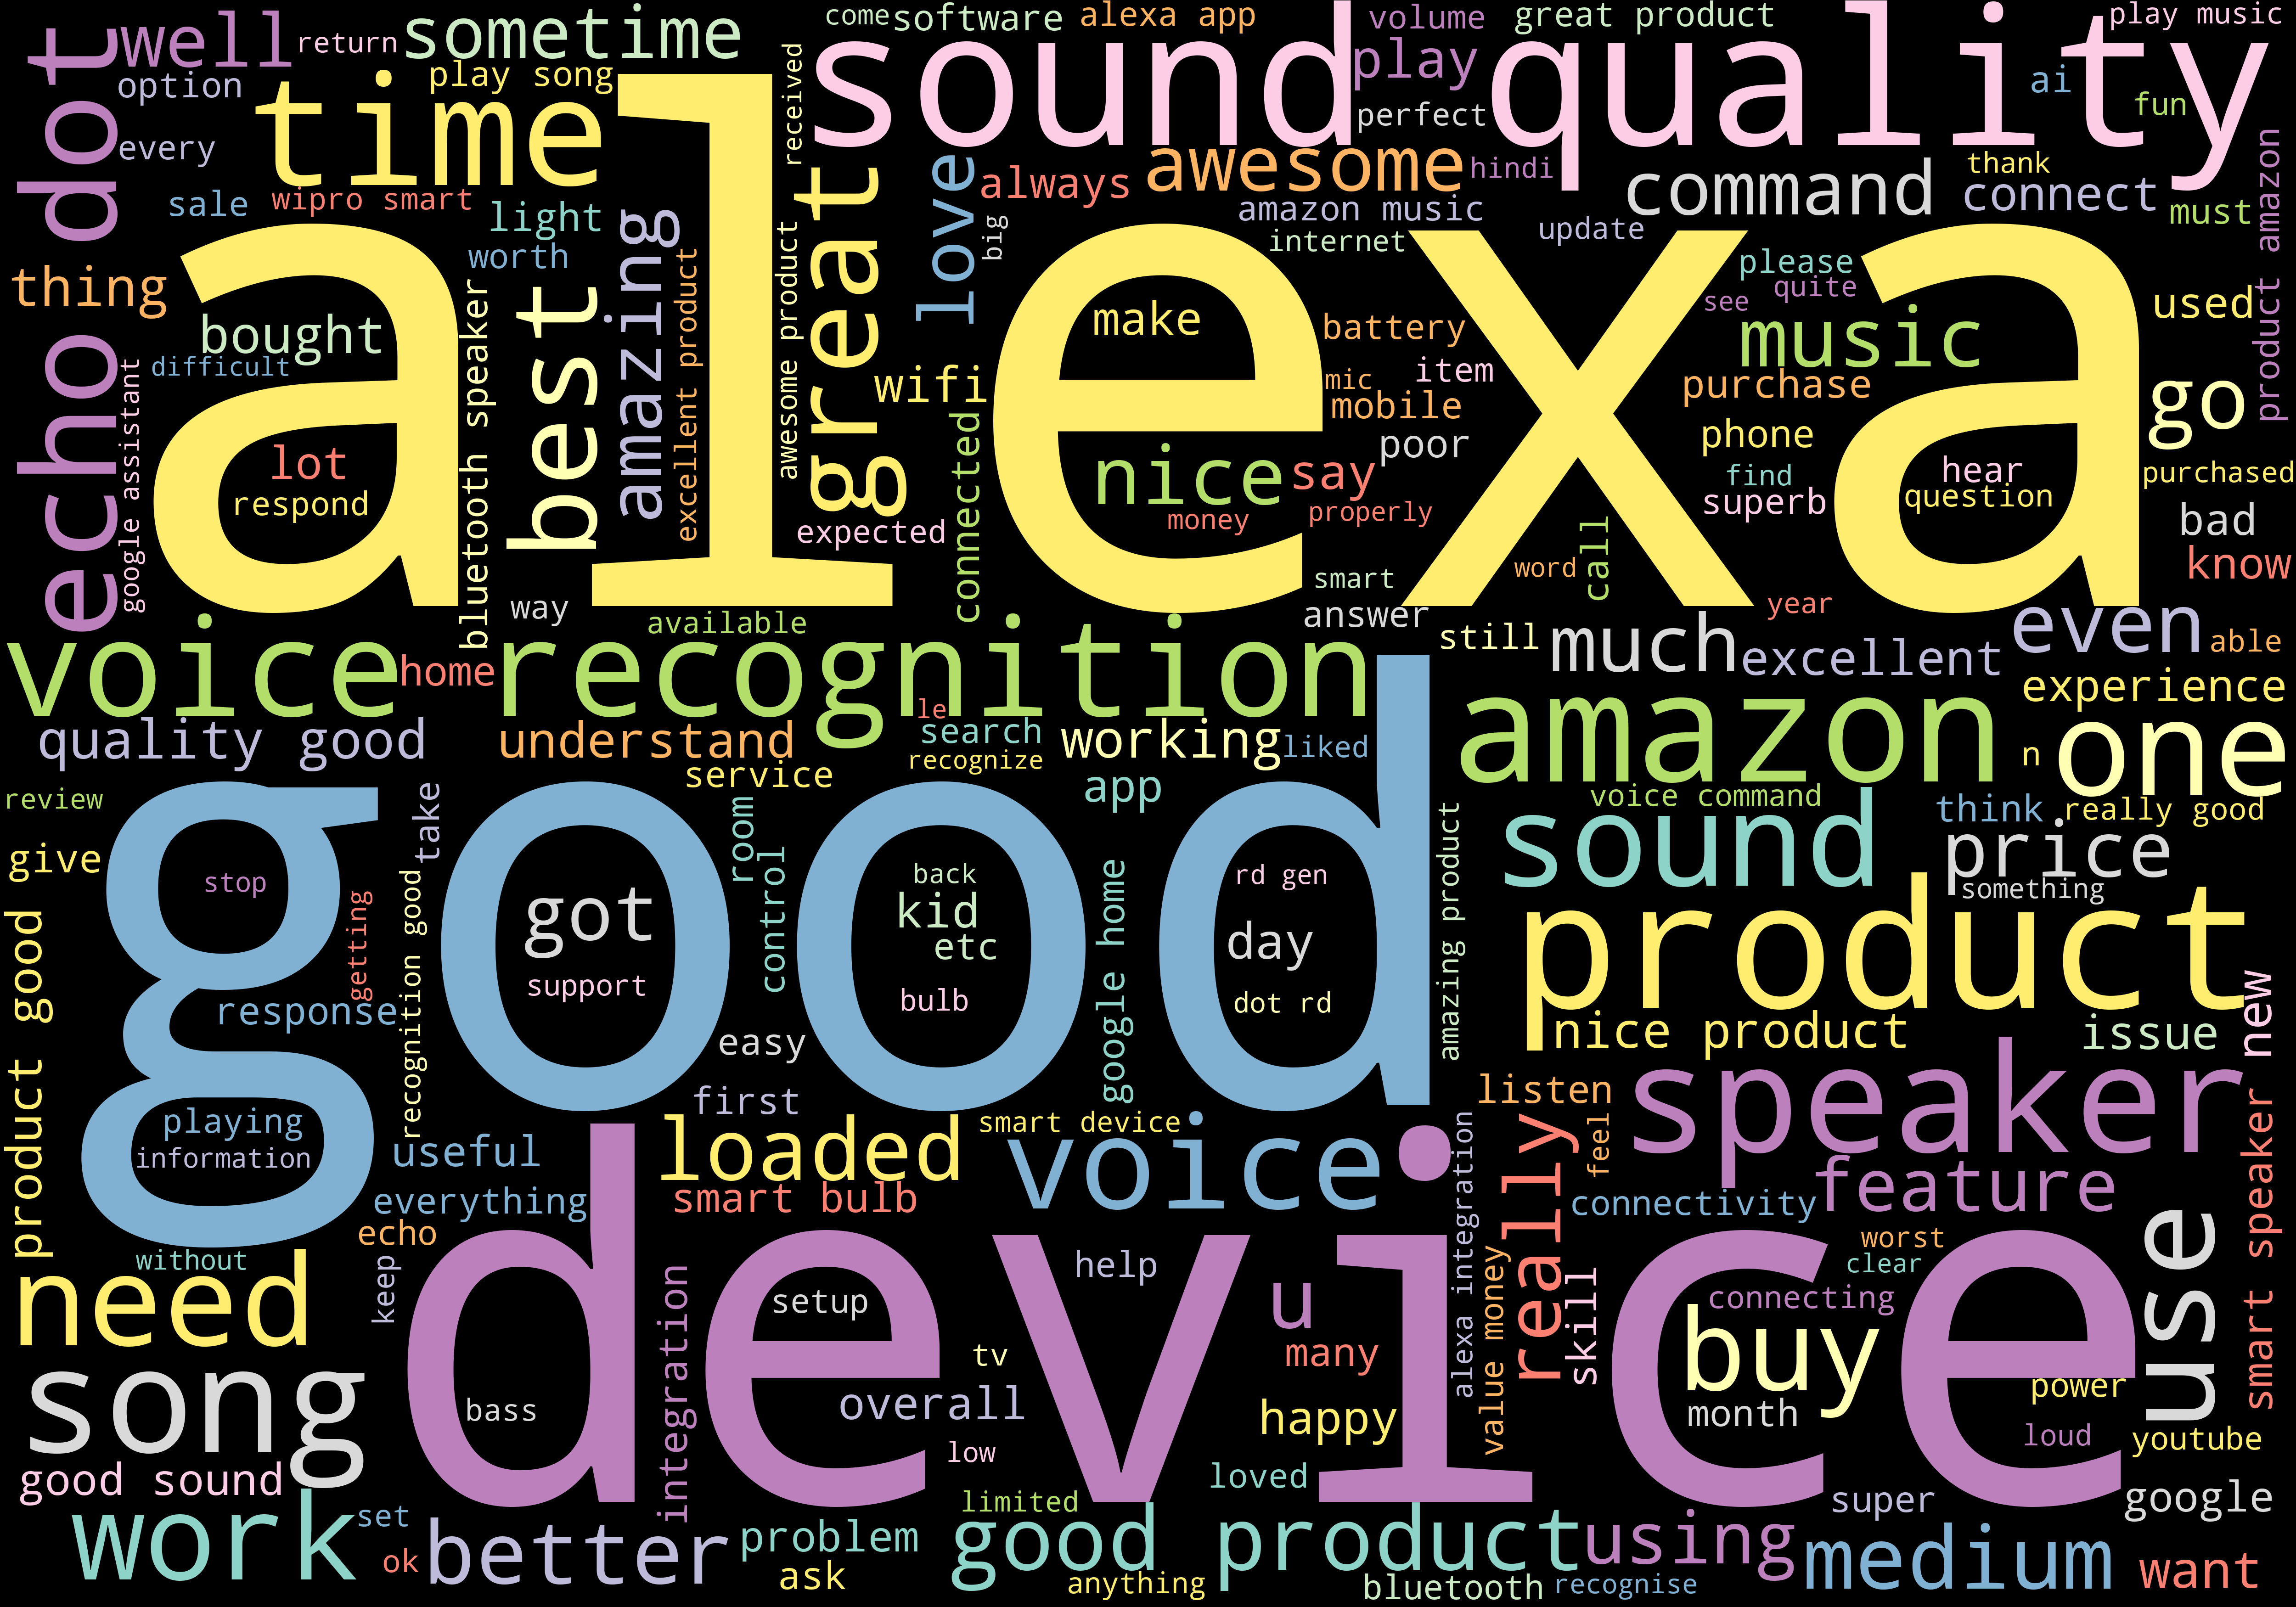

In [ ]:
plt.rcParams["figure.figsize"]=(19,13)
px.imshow(wordcloud, width=1000,
    height=600)

### Treating Sentimental Analysis by using Afinn file

In [ ]:
text_data = pd.read_csv("amazon_product_webscrp_reviews.csv", error_bad_lines=False)

In [ ]:
del text_data['Unnamed: 0']

In [ ]:
text_data.dropna(inplace=True)

In [ ]:
body_text = [x.strip() for x in text_data.Body]

In [ ]:
body_text = [x for x in body_text if x]

In [ ]:
text_body = ' '.join(body_text)

In [ ]:
text_body

'Even the best devices can be ruined by poor software and bad UI. This is a classic case of a good device such as the Echo dot 3rd gen let down by horrendous software. In terms of sheer sound quality and ability to hear you across the room, the ED 3rd blows google home mini right out of the water, and... that\'s where it stops.I bought it for 2299 and got a wipro bulb free, I figured that it couldn\'t be a bad purchase. Boy was I wrong!Let\'s begin with the Alexa app, whoever is in charge of making that app should be sent back to 2012. Remember when you had no clue whether you tapped on a button or not because the taps weren\'t highlighted? Remember how everything used to be unresponsive back then? Yeah, that\'s Alexa app for you. SD 855 and 8gigs of ram on your phone? LoL, Alexa don\'t care! The layout, the buttons in the app, the navigation, ugh.. takes me back to the 90\'s. A big zero on ease of use or navigational hierarchy. Forget Grandpa, even millennials would have a hard time w

In [ ]:
sentences = tokenize.sent_tokenize(text_body)

In [ ]:
sentences[:10]

['Even the best devices can be ruined by poor software and bad UI.',
 'This is a classic case of a good device such as the Echo dot 3rd gen let down by horrendous software.',
 "In terms of sheer sound quality and ability to hear you across the room, the ED 3rd blows google home mini right out of the water, and... that's where it stops.I bought it for 2299 and got a wipro bulb free, I figured that it couldn't be a bad purchase.",
 "Boy was I wrong!Let's begin with the Alexa app, whoever is in charge of making that app should be sent back to 2012.",
 "Remember when you had no clue whether you tapped on a button or not because the taps weren't highlighted?",
 'Remember how everything used to be unresponsive back then?',
 "Yeah, that's Alexa app for you.",
 'SD 855 and 8gigs of ram on your phone?',
 "LoL, Alexa don't care!",
 "The layout, the buttons in the app, the navigation, ugh.. takes me back to the 90's."]

In [ ]:
text_df = pd.DataFrame(review_data, columns=['review'])

In [ ]:
text_df.head(11)

review
0   even best device ruined poor software bad ui c...
1   purchased birthday gift year old son since sib...
2   medium could loaded uploading video enjoy idio...
3   one best deal ever got amazon purchased watt w...
4   buying product please keep point mind need ama...
5   medium could loaded worst experience alexa war...
6   using alexa dot nd gen today gifted dot rd gen...
7   using getting bulb worth making echo dot rough...
8   quite confused echo dot rd th gen bought try t...
9   medium could loaded buy product asked alexa ka...
10  medium could loaded bought wipro w smart bulb ...

In [ ]:
!pip install afinn

In [ ]:
afinn = pd.read_csv("Afinn.csv", sep=',', encoding='latin-1')

In [ ]:
afinn.head(11)

word  value
0      abandon     -2
1    abandoned     -2
2     abandons     -2
3     abducted     -2
4    abduction     -2
5   abductions     -2
6        abhor     -3
7     abhorred     -3
8    abhorrent     -3
9       abhors     -3
10   abilities      2

In [ ]:
afinn_dict = afinn.set_index('word')['value'].to_dict()

In [ ]:
afinn_dict

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [ ]:
#!python -m spacy download en

In [ ]:
nlp = spacy.load('en_core_web_sm')
lexicons = afinn_dict

def give_sentiment_value(text: str=None):
    sentiment = 0
    if text:
        sentence =nlp(text)
    for word in sentence:
        sentiment+=lexicons.get(word.lemma_,0)
    return sentiment

In [ ]:
give_sentiment_value('average')

0

In [ ]:
text_df['Sentiment Values']=product_data['Body'].apply(lambda x:give_sentiment_value(x))

In [ ]:
pd.set_option('max_rows', None)
text_df.head(11)

review  Sentiment Values
0   even best device ruined poor software bad ui c...              24.0
1   purchased birthday gift year old son since sib...              19.0
2   medium could loaded uploading video enjoy idio...              18.0
3   one best deal ever got amazon purchased watt w...              10.0
4   buying product please keep point mind need ama...               4.0
5   medium could loaded worst experience alexa war...             -20.0
6   using alexa dot nd gen today gifted dot rd gen...               0.0
7   using getting bulb worth making echo dot rough...               2.0
8   quite confused echo dot rd th gen bought try t...               2.0
9   medium could loaded buy product asked alexa ka...               0.0
10  medium could loaded bought wipro w smart bulb ...               7.0

In [ ]:
text_df.isnull().sum()

review               0
Sentiment Values    16
dtype: int64

In [ ]:
text_df['Sentiment Values'].fillna(0, inplace=True)

In [ ]:
text_df.describe()

Sentiment Values
count       3484.000000
mean           3.328645
std            4.424591
min          -20.000000
25%            0.000000
50%            3.000000
75%            5.000000
max           62.000000

In [ ]:
def sentiments(value):
    if(value>=1):
        return 1
    elif(value<= -1):
        return -1
    else:
        return 0

In [ ]:
text_df['Sentiments']= text_df['Sentiment Values'].apply(lambda x: sentiments(x))

In [ ]:
text_df.head(11)

review  Sentiment Values  \
0   even best device ruined poor software bad ui c...              24.0   
1   purchased birthday gift year old son since sib...              19.0   
2   medium could loaded uploading video enjoy idio...              18.0   
3   one best deal ever got amazon purchased watt w...              10.0   
4   buying product please keep point mind need ama...               4.0   
5   medium could loaded worst experience alexa war...             -20.0   
6   using alexa dot nd gen today gifted dot rd gen...               0.0   
7   using getting bulb worth making echo dot rough...               2.0   
8   quite confused echo dot rd th gen bought try t...               2.0   
9   medium could loaded buy product asked alexa ka...               0.0   
10  medium could loaded bought wipro w smart bulb ...               7.0   

    Sentiments  
0            1  
1            1  
2            1  
3            1  
4            1  
5           -1  
6            0  
7            1  
8            1  
9            0  
10           1

In [ ]:
text_df.to_csv("nlpdata")

### Positive Sentiments Values

In [ ]:
text_df[text_df['Sentiment Values']>=1].sort_values(by= 'Sentiments',ascending=True).head(11)

review  Sentiment Values  \
0     even best device ruined poor software bad ui c...              24.0   
2298  superb product crystal clear sound first smart...               4.0   
2299                                  beautiful product               4.0   
2300                                  excellent product               7.0   
2301  good people want live like tony stark aka iron...               3.0   
2302  thank amazon best service providerfastest serv...               2.0   
2303                                          good keep              12.0   
2304       great speaker great voice command processing               3.0   
2305                         great device home easy use               3.0   
2306                                       good product               6.0   
2307                                            awesome               8.0   

      Sentiments  
0              1  
2298           1  
2299           1  
2300           1  
2301           1  
2302           1  
2303           1  
2304           1  
2305           1  
2306           1  
2307           1

### Neutral Sentiment Values

In [ ]:
text_df[text_df['Sentiment Values']==0].sort_values(by= 'Sentiment Values',ascending=True).head(11)

review  Sentiment Values  \
6     using alexa dot nd gen today gifted dot rd gen...               0.0   
2620                                medium could loaded               0.0   
2622                                good sound portable               0.0   
2625                            connection process long               0.0   
2626                                 need collaboration               0.0   
2631                                              great               0.0   
2632                                  amazon alexa best               0.0   
2634  lil hard set first make sure wifi router nearb...               0.0   
2618  amazing product loved product drawback work pl...               0.0   
2641               medium could loaded useful age group               0.0   
2650  good answering question always saying know answer               0.0   

      Sentiments  
6              0  
2620           0  
2622           0  
2625           0  
2626           0  
2631           0  
2632           0  
2634           0  
2618           0  
2641           0  
2650           0

### Negative Sentiments Values

In [ ]:
text_df[text_df['Sentiment Values']<=-1].sort_values(by= 'Sentiment Values',ascending=True).head(11)

review  Sentiment Values  \
5     medium could loaded worst experience alexa war...             -20.0   
942   bad quality product supplied highly disappoint...             -13.0   
29    bought productivity tool pandemic drift office...             -12.0   
31    alexa horribly wrong dumb made mistake buying ...              -9.0   
571   returned worst product ever seen sound underst...              -9.0   
2469                                      nice enjoying              -8.0   
1876  product good st time user family found useful ...              -8.0   
41    useless device waste money work registered wif...              -8.0   
674   purchased product week stoped working got repl...              -8.0   
664   worst product received amazon worked well day ...              -8.0   
567   idiot box need internet connectivity power sup...              -7.0   

      Sentiments  
5             -1  
942           -1  
29            -1  
31            -1  
571           -1  
2469          -1  
1876          -1  
41            -1  
674           -1  
664           -1  
567           -1

In [ ]:
text_df.shape

(3484, 3)

In [ ]:
text_df['Sentiments'].value_counts()

 1    2477
 0     639
-1     368
Name: Sentiments, dtype: int64

### Positive Reviews

In [ ]:
product_data[product_data['Sentiments']>=1].sort_values(by= 'Sentiments',ascending=True).head(11)

Customer Name                                           Review  \
3                Sumit                    I recommend one more accessory   
2444     Paresh R. Mota                                             Good   
2443           Dharmvir                                        Excellent   
2440       Poonam Gupta  good sound, need to be update on Hindi language   
2439        Tausif alam                             It's useful and good   
2436    Ganesh tripathi                        But without WiFi not play   
2435           Mahendra                                    Alexa naughty   
2432      ranjit gujral                  I thought it has inbuilt batter   
2431  Sneha Deshbhratar                                    Amazing Alexa   
2430       robin thomas                                              wow   
2429       Gouri pandit                                      Wow Product   

      Ratings                                               Body  Polarity  \
3         5.0  Its just one if the best deal i ever got on am...  0.315833   
2444      4.0                                          Excellent  1.000000   
2443      5.0                                 Excellent response  1.000000   
2440      5.0  sound is good, but plz update language setting...  0.550000   
2439      5.0  I like this product it's very useful and porta...  0.390000   
2436      4.0  Nice voice..enjoy but without WiFi ... didn't ...  0.600000   
2435      5.0                                  Very nice go head  0.780000   
2432      3.0  Good product, good for auromation and music, b...  0.700000   
2431      5.0  Alexa 3rd generation Echo is amazing with grea...  0.520000   
2430      4.0  This is best speaker but it is not wireless an...  0.422222   
2429      5.0                       Nice entertainment device...  0.600000   

      Word Count  Review Length  Common Word Length  Sentiments    Labels  
3             99            508            4.141414           1  POSITIVE  
2444           1              9            9.000000           1  POSITIVE  
2443           2             18            8.500000           1  POSITIVE  
2440          18            106            4.944444           1  POSITIVE  
2439          19            107            4.684211           1  POSITIVE  
2436           8             50            5.375000           1  POSITIVE  
2435           4             17            3.500000           1  POSITIVE  
2432          11             71            5.545455           1  POSITIVE  
2431          16            104            5.562500           1  POSITIVE  
2430          14             65            3.714286           1  POSITIVE  
2429           3             28            8.666667           1  POSITIVE

### Neutral Reviews

In [ ]:
product_data[product_data['Sentiments']==0].sort_values(by= 'Sentiments',ascending=True).head(11)

Customer Name  \
0     Thakur Ankur Kumar Pratap singh   
2110                      Neha Akhtar   
2109                     Ashim Barman   
2105                        Deepak R.   
2102                    B. Subhashini   
2098                 Amazon Customer    
2095              Prudhvi Neelakantam   
2093                   G Ramaesh Babu   
2092                    Susheela Negi   
2090                      Sunny Verma   
2087                              Brj   

                                                 Review  Ratings  \
0                           Google is infinitely better      1.0   
2110  don't want alexa this doesn't work my waste of...      1.0   
2109                                     It's very good      5.0   
2105                High quality sound.  Voice  is Gud.      5.0   
2102                                 Less sound speaker      2.0   
2098                                    Dummy echo spot      1.0   
2095                                          Okay okay      3.0   
2093                                        Truly smart      4.0   
2092                                          Very nice      5.0   
2090                                          Bass only      5.0   
2087                                         Wipro bulb      5.0   

                                                   Body  Polarity  Word Count  \
0     Even the best devices can be ruined by poor so...  0.162885         641   
2110  don't want alexa this doesn't work my waste of... -0.200000          10   
2109                      The media could not be loa...  0.000000           6   
2105  High quality  sound.  But connection is  not s...  0.140000          24   
2102  Voice recognition is good. Very less sound in ...  0.189583          13   
2098  The device was not detecting a Wi-Fi hot-spot ...  0.225000          22   
2095                          Sync problem, no guidance  0.000000           4   
2093     Truly smart, slight lag in processing commands  0.023810           7   
2092                                                 Op  0.000000           1   
2090  Sound quality bass is low only one thing or an...  0.150000          13   
2087  I've got wipro bulb replaced but other colours... -0.125000          12   

      Review Length  Common Word Length  Sentiments   Labels  
0              3604            4.624025           0  NEUTRAL  
2110             52            4.300000           0  NEUTRAL  
2109             67            4.166667           0  NEUTRAL  
2105            147            4.833333           0  NEUTRAL  
2102             84            5.538462           0  NEUTRAL  
2098            126            4.772727           0  NEUTRAL  
2095             25            5.500000           0  NEUTRAL  
2093             46            5.714286           0  NEUTRAL  
2092              2            2.000000           0  NEUTRAL  
2090             64            4.000000           0  NEUTRAL  
2087             69            4.833333           0  NEUTRAL

### Negative Reviews

In [ ]:
product_data[product_data['Sentiments']<=-1].sort_values(by= 'Sentiments',ascending=True).head(11)

Customer Name                                             Review  \
5     Akash singh nishad  No warranty should be given to you so be alert...   
2425     SAIKAT MAJUMDER  it will work for few months after that speaker...   
2396    Urmila Khatavkar                                       Poor Quality   
2380       Bharathi king                    Very Bad Product doesn't listen   
2293               Tamil                                      HELP KRDO PLZ   
2242             shankar                                   Wastage of money   
2235  Nandkishor Narwade                                   Connecting issue   
2218              Seraph                                     Waste of money   
2181        asmit gangil  You dont have to be a tech person to use it an...   
2167        Nipa Hathila                                   Useless product.   
2125       Brajen sarkar                             Like an ordinary radio   

      Ratings                                               Body  Polarity  \
5         1.0                      The media could not be loa...  -0.29500   
2425      1.0  After warranty period.. my alexa stopped worki...  -0.52000   
2396      1.0                                           Pathetic  -1.00000   
2380      1.0        Very bad product doesn't listen the command  -0.91000   
2293      5.0  Can I get help as I have very bad internet con...  -0.47000   
2242      1.0               Very poor quality. Wastage of money.  -0.52000   
2235      2.0  It doesn't connect automatically to the same w...  -0.40625   
2218      2.0  Alexa is worst product if you say alexa mosqui...  -0.70000   
2181      5.0                      The media could not be loa...  -0.30000   
2167      2.0       Useless product. Not getting command propey.  -0.50000   
2125      2.0  Does not play radio channels.. Does not unders...  -0.43750   

      Word Count  Review Length  Common Word Length  Sentiments    Labels  
5            159            960            4.786164          -1  NEGATIVE  
2425          10             67            5.800000          -1  NEGATIVE  
2396           1              8            8.000000          -1  NEGATIVE  
2380           7             43            5.285714          -1  NEGATIVE  
2293          32            132            3.156250          -1  NEGATIVE  
2242           6             36            5.166667          -1  NEGATIVE  
2235          26            132            4.115385          -1  NEGATIVE  
2218          23            129            4.652174          -1  NEGATIVE  
2181          15            121            4.400000          -1  NEGATIVE  
2167           6             44            6.500000          -1  NEGATIVE  
2125          12             76            5.416667          -1  NEGATIVE

### Overall Reviews

In [ ]:
product_data["Index Clone"]=range(0,3484)

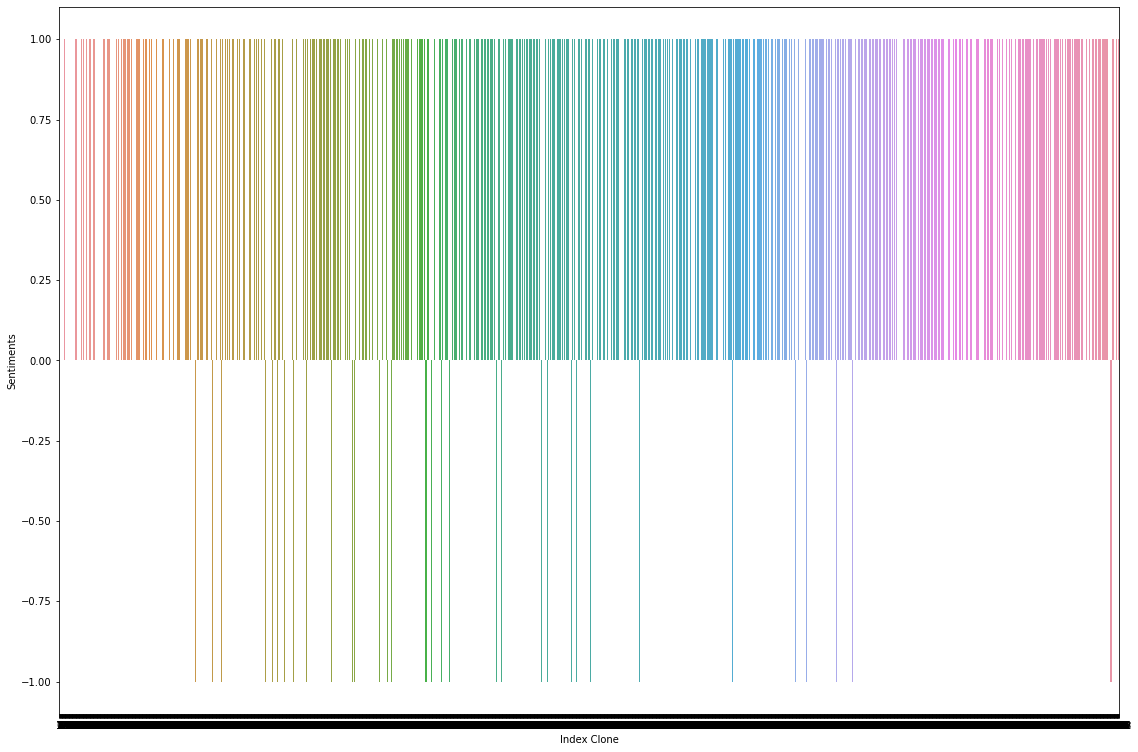

In [ ]:
sns.barplot(product_data["Index Clone"],product_data["Sentiments"])
plt.show()

### Overall review based on Sentiment Values

In [ ]:
text_df["Index Clone"]=range(0,3484)

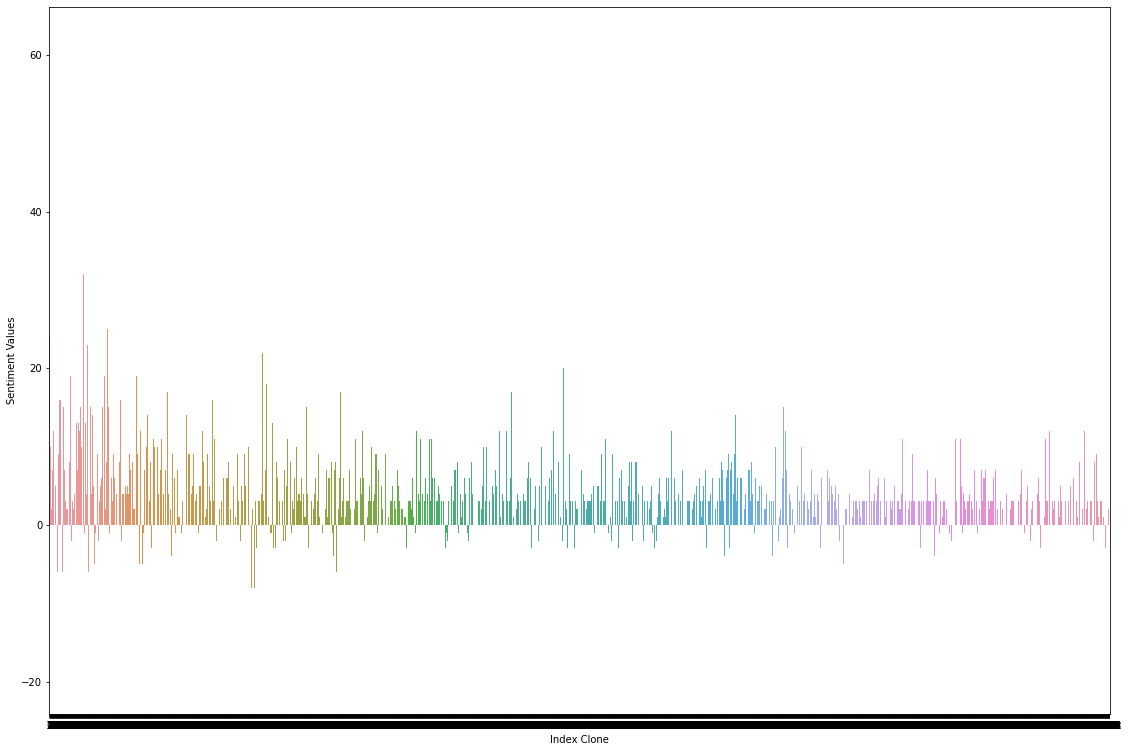

In [ ]:
sns.barplot(text_df["Index Clone"],text_df["Sentiment Values"])
plt.show()

In [ ]:
text_df["Sentiment Values"].mean()

3.328645235361653

### ---> Overall Sentiment Of this Product is Positive for us.

### Vector Representation By using Bag Of Words Model

In [ ]:
#cv=CountVectorizer()
#encoded_data =cv.fit_transform(review_data).toarray()

In [ ]:
#encoded_data

### Vector Representation By using TF-IDF( Term Frequency and Inverse Document Frequency) Model

In [ ]:
review_data[:5]

['even best device ruined poor software bad ui classic case good device echo dot rd gen let horrendous software term sheer sound quality ability hear across room ed rd blow google home mini right water stop bought got wipro bulb free figured bad purchase boy wrong let begin alexa app whoever charge making app sent back remember clue whether tapped button tap highlighted remember everything used unresponsive back yeah alexa app sd gig ram phone lol alexa care layout button app navigation ugh take back big zero ease use navigational hierarchy forget grandpa even millennials would hard time app voice recognition time recognize every time smartness lack smartness displayed start asking follow question tallest man give answer follow tall alexa go berserk heralding device control light turn tv miraculous achievement blatant lie control via command nothing new people coding community done raspberry pi make smart incousion ai machine learning understands patter recognizes speech slur something

In [ ]:
tfidf = TfidfVectorizer()

In [ ]:
encoded_data = tfidf.fit_transform(review_data).toarray()

In [ ]:
encoded_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# 5) MODEL BUILDING

In [ ]:
X = encoded_data
Y = product_data["Sentiments"]

In [ ]:
type(X)

numpy.ndarray

In [ ]:
pd.set_option('max_rows', None)
pd.DataFrame(X).head(21)

0     1     2     3     4     5     6     7     8     9     ...      4553  \
0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.000000   
1    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.000000   
2    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.000000   
3    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.000000   
4    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.000000   
5    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.000000   
6    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.000000   
7    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.000000   
8    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.000000   
9    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.000000   
10   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.000000   
11   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.000000   
12   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.000000   
13   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.000000   
14   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.000000   
15   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.000000   
16   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.000000   
17   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.000000   
18   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.190477   
19   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.000000   
20   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.000000   

    4554  4555  4556  4557  4558      4559  4560  4561  4562  
0    0.0   0.0   0.0   0.0   0.0  0.053892   0.0   0.0   0.0  
1    0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  
2    0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  
3    0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  
4    0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  
5    0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  
6    0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  
7    0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  
8    0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  
9    0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  
10   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  
11   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  
12   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  
13   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  
14   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  
15   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  
16   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  
17   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  
18   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  
19   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  
20   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  

[21 rows x 4563 columns]

In [ ]:
type(Y)

pandas.core.series.Series

In [ ]:
Y.head(21)

0     0
1     0
2     0
3     1
4     0
5    -1
6     0
7     0
8     0
9     0
10    0
11    0
12   -1
13    0
14    0
15    1
16    0
17    1
18    1
19    1
20    1
Name: Sentiments, dtype: int64

### BALANCING THE DATA

In [ ]:
smote = SMOTE()

In [ ]:
X,Y = smote.fit_resample(X,Y)

In [ ]:
counter = Counter(Y)
counter

Counter({0: 2079, 1: 2079, -1: 2079})

In [ ]:
for k,v in counter.items():
    per = v / len(Y) * 100
    print(" Class=%d, n=%d, %.3f%%" % (k,v,per))

 Class=0, n=2079, 33.333%
 Class=1, n=2079, 33.333%
 Class=-1, n=2079, 33.333%


In [ ]:
Y.value_counts()

 0    2079
 1    2079
-1    2079
Name: Sentiments, dtype: int64

### Train Test Split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.20, shuffle=True, random_state=2)

In [ ]:
X_train.shape, Y_train.shape

((4989, 4563), (4989,))

In [ ]:
X_test.shape, Y_test.shape

((1248, 4563), (1248,))

In [ ]:
px.bar( x=counter.keys(),
    y=counter.values(),
    color=counter.keys(),)

# 6) MODEL TRAINING | 7) MODEL TESTING | 8) MODEL EVALUATION

### RANDOM FOREST MODEL

In [ ]:
rf_model1 = RandomForestClassifier()

In [ ]:
rf_model1.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
Y_train_pred1 = rf_model1.predict(X_train)

In [ ]:
Y_test_pred1 = rf_model1.predict(X_test)

#### TRAIN DATA

In [ ]:
print(accuracy_score(Y_train,Y_train_pred1))
print(classification_report(Y_train,Y_train_pred1))
print(confusion_matrix(Y_train,Y_train_pred1))

0.997995590298657
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1665
           0       1.00      1.00      1.00      1663
           1       1.00      1.00      1.00      1661

    accuracy                           1.00      4989
   macro avg       1.00      1.00      1.00      4989
weighted avg       1.00      1.00      1.00      4989

[[1661    0    4]
 [   0 1661    2]
 [   1    3 1657]]


#### TEST DATA

In [ ]:
print(accuracy_score(Y_test,Y_test_pred1))
print(classification_report(Y_test,Y_test_pred1))
print(confusion_matrix(Y_test,Y_test_pred1))

0.9014423076923077
              precision    recall  f1-score   support

          -1       0.99      0.99      0.99       414
           0       0.84      0.88      0.86       416
           1       0.88      0.84      0.86       418

    accuracy                           0.90      1248
   macro avg       0.90      0.90      0.90      1248
weighted avg       0.90      0.90      0.90      1248

[[409   1   4]
 [  5 365  46]
 [  0  67 351]]


### SUPPORT VECTOR MACHINE (SVM) MODEL

In [ ]:
svm_model2 = SVC()
svm_model2.fit(X_train,Y_train)

SVC()

In [ ]:
Y_train_pred2 = svm_model2.predict(X_train)

In [ ]:
Y_test_pred2 = svm_model2.predict(X_test)

#### TRAIN DATA

In [ ]:
print(accuracy_score(Y_train,Y_train_pred2))
print(classification_report(Y_train,Y_train_pred2))
print(confusion_matrix(Y_train,Y_train_pred2))

0.9915814792543596
              precision    recall  f1-score   support

          -1       1.00      0.99      0.99      1665
           0       1.00      0.99      0.99      1663
           1       0.98      1.00      0.99      1661

    accuracy                           0.99      4989
   macro avg       0.99      0.99      0.99      4989
weighted avg       0.99      0.99      0.99      4989

[[1648    0   17]
 [   3 1645   15]
 [   2    5 1654]]


#### TEST DATA

In [ ]:
print(accuracy_score(Y_test,Y_test_pred2))
print(classification_report(Y_test,Y_test_pred2))
print(confusion_matrix(Y_test,Y_test_pred2))

0.9118589743589743
              precision    recall  f1-score   support

          -1       0.99      0.98      0.99       414
           0       0.88      0.87      0.88       416
           1       0.87      0.88      0.87       418

    accuracy                           0.91      1248
   macro avg       0.91      0.91      0.91      1248
weighted avg       0.91      0.91      0.91      1248

[[407   0   7]
 [  3 363  50]
 [  1  49 368]]


#### NAIVE BAYES MODEL

In [ ]:
nb_model3 = MultinomialNB()
nb_model3.fit(X_train, Y_train)

MultinomialNB()

In [ ]:
Y_train_pred3 = nb_model3.predict(X_train)
Y_test_pred3 = nb_model3.predict(X_test)

#### TRAIN DATA

In [ ]:
print(accuracy_score(Y_train,Y_train_pred3))
print(classification_report(Y_train,Y_train_pred3))
print(confusion_matrix(Y_train,Y_train_pred3))

0.8835437963519743
              precision    recall  f1-score   support

          -1       0.88      0.97      0.92      1665
           0       0.92      0.76      0.83      1663
           1       0.86      0.92      0.89      1661

    accuracy                           0.88      4989
   macro avg       0.89      0.88      0.88      4989
weighted avg       0.89      0.88      0.88      4989

[[1617    6   42]
 [ 184 1262  217]
 [  32  100 1529]]


#### TEST DATA

In [ ]:
print(accuracy_score(Y_test,Y_test_pred3))
print(classification_report(Y_test,Y_test_pred3))
print(confusion_matrix(Y_test,Y_test_pred3))

0.8213141025641025
              precision    recall  f1-score   support

          -1       0.87      0.96      0.91       414
           0       0.84      0.65      0.73       416
           1       0.76      0.86      0.81       418

    accuracy                           0.82      1248
   macro avg       0.82      0.82      0.82      1248
weighted avg       0.82      0.82      0.82      1248

[[396   3  15]
 [ 51 269  96]
 [ 10  48 360]]


### KNN METHOD

In [ ]:
knn_model4 = KNeighborsClassifier()
knn_model4.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
Y_train_pred4 = knn_model4.predict(X_train)
Y_test_pred4 = knn_model4.predict(X_test)

#### TRAIN DATA

In [ ]:
print(accuracy_score(Y_train,Y_train_pred4))
print(classification_report(Y_train,Y_train_pred4))
print(confusion_matrix(Y_train,Y_train_pred4))

0.7710964121066346
              precision    recall  f1-score   support

          -1       0.97      1.00      0.99      1665
           0       0.60      0.98      0.75      1663
           1       0.97      0.33      0.50      1661

    accuracy                           0.77      4989
   macro avg       0.85      0.77      0.74      4989
weighted avg       0.85      0.77      0.74      4989

[[1659    0    6]
 [  19 1633   11]
 [  24 1082  555]]


#### TEST DATA

In [ ]:
print(accuracy_score(Y_test,Y_test_pred4))
print(classification_report(Y_test,Y_test_pred4))
print(confusion_matrix(Y_test,Y_test_pred4))

0.749198717948718
              precision    recall  f1-score   support

          -1       0.96      0.99      0.98       414
           0       0.58      0.97      0.73       416
           1       0.92      0.29      0.44       418

    accuracy                           0.75      1248
   macro avg       0.82      0.75      0.72      1248
weighted avg       0.82      0.75      0.71      1248

[[411   0   3]
 [  5 403   8]
 [ 10 287 121]]


### DECISSION TREE METHOD

In [ ]:
dt_model5 = DecisionTreeClassifier()
dt_model5.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
Y_train_pred5 = dt_model5.predict(X_train)
Y_test_pred5 = dt_model5.predict(X_test)

#### TRAIN DATA

In [ ]:
print(accuracy_score(Y_train,Y_train_pred5))
print(classification_report(Y_train,Y_train_pred5))
print(confusion_matrix(Y_train,Y_train_pred5))

0.997995590298657
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1665
           0       1.00      1.00      1.00      1663
           1       1.00      1.00      1.00      1661

    accuracy                           1.00      4989
   macro avg       1.00      1.00      1.00      4989
weighted avg       1.00      1.00      1.00      4989

[[1662    0    3]
 [   0 1661    2]
 [   2    3 1656]]


#### TEST DATA

In [ ]:
print(accuracy_score(Y_test,Y_test_pred5))
print(classification_report(Y_test,Y_test_pred5))
print(confusion_matrix(Y_test,Y_test_pred5))

0.8814102564102564
              precision    recall  f1-score   support

          -1       0.95      0.98      0.96       414
           0       0.86      0.79      0.82       416
           1       0.83      0.88      0.85       418

    accuracy                           0.88      1248
   macro avg       0.88      0.88      0.88      1248
weighted avg       0.88      0.88      0.88      1248

[[405   3   6]
 [ 20 328  68]
 [  1  50 367]]


### LOGISTIC REGRESSION MODEL

In [ ]:
log_model6 = LogisticRegression()
log_model6.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
Y_train_pred6 = log_model6.predict(X_train)
Y_test_pred6 = log_model6.predict(X_test)

#### TRAIN DATA

In [ ]:
print(accuracy_score(Y_train,Y_train_pred6))
print(classification_report(Y_train,Y_train_pred6))
print(confusion_matrix(Y_train,Y_train_pred6))

0.9392663860493085
              precision    recall  f1-score   support

          -1       0.97      0.98      0.98      1665
           0       0.91      0.93      0.92      1663
           1       0.93      0.90      0.92      1661

    accuracy                           0.94      4989
   macro avg       0.94      0.94      0.94      4989
weighted avg       0.94      0.94      0.94      4989

[[1632    1   32]
 [  35 1553   75]
 [  10  150 1501]]


#### TEST DATA

In [ ]:
print(accuracy_score(Y_test,Y_test_pred6))
print(classification_report(Y_test,Y_test_pred6))
print(confusion_matrix(Y_test,Y_test_pred6))

0.8822115384615384
              precision    recall  f1-score   support

          -1       0.97      0.97      0.97       414
           0       0.82      0.88      0.85       416
           1       0.86      0.80      0.83       418

    accuracy                           0.88      1248
   macro avg       0.88      0.88      0.88      1248
weighted avg       0.88      0.88      0.88      1248

[[400   1  13]
 [ 10 365  41]
 [  3  79 336]]


In [ ]:
### Presenting all model ACcura

In [ ]:
a = dict()
a['Random Forest']= accuracy_score(Y_test, Y_test_pred1)
a['SVC'] = accuracy_score(Y_test, Y_test_pred2)
a['Naive bayes'] =accuracy_score(Y_test, Y_test_pred3)
a['KNN']= accuracy_score(Y_test, Y_test_pred4)
a['Decision Tree']= accuracy_score(Y_test, Y_test_pred5)
a['Logistic Regressor']= accuracy_score(Y_test, Y_test_pred6)

In [ ]:
a

{'Random Forest': 0.9014423076923077,
 'SVC': 0.9118589743589743,
 'Naive bayes': 0.8213141025641025,
 'KNN': 0.749198717948718,
 'Decision Tree': 0.8814102564102564,
 'Logistic Regressor': 0.8822115384615384}

In [ ]:
models_table = pd.DataFrame(list(a.items()), columns=['Model', 'Accuracy'])

In [ ]:
acc = models_table.sort_values('Accuracy', ascending=False)

In [ ]:
acc

Model  Accuracy
1                 SVC  0.911859
0       Random Forest  0.901442
5  Logistic Regressor  0.882212
4       Decision Tree  0.881410
2         Naive bayes  0.821314
3                 KNN  0.749199

In [ ]:
px.bar( data_frame=acc,
    x='Model',
    y='Accuracy',
    color='Model')

### SVM model is Finalised

### Predictive System

In [ ]:
def get_num_data(num):
    if (num == 1):
        print('this is positive')
    elif (num == 0):
        print('this is Neutral')
    else :
        print('this is Negative')

In [ ]:
def get_text_data(text):
    a = text_mining(text)
    b = tfidf.transform(a).toarray()
    c = svm_model2.predict(b)
    get_num_data(c)
    

In [ ]:
text1=['Alexa is working good']

In [ ]:
text2=['performance is bad']

In [ ]:
text3 = ['product is Average']

In [ ]:
get_text_data(text1)

this is positive


In [ ]:
get_text_data(text2)

this is Negative


In [ ]:
get_text_data(text3)

this is Neutral
